C:\Users\timda\miniconda3\envs\spyder-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\timda\miniconda3\envs\spyder-env\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\timda\miniconda3\envs\spyder-env\lib\site-packages\umap\distances.py:

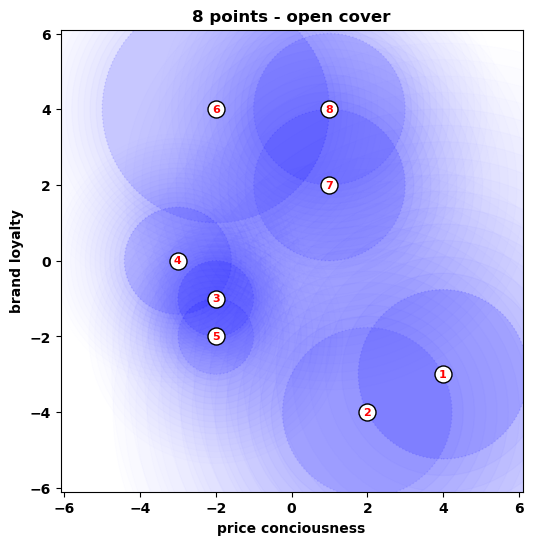

In [1]:
# works on pandas 1.5.3, numpy 1.24.3, matplotlib 3.6.2, scipy 1.10.1 and umap-learn 0.5.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from matplotlib.patches import Polygon
from scipy.spatial.distance import cdist

eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7,6,2,0,3,1,5,4], :]

distances = cdist(eight, eight)
sorted_indices = np.argsort(distances, axis=1)
closest_indices = sorted_indices[:, 1]
second_closest_indices = sorted_indices[:,2]

fig, ax = plt.subplots(figsize=(8, 6))

colors = plt.get_cmap('Blues')

for i in range(0, 8):
    ax.scatter(eight[i, 0], eight[i, 1], c = "w", edgecolor = "black", s = 150,
               zorder = 10)
    ax.text(eight[i, 0], eight[i, 1], str(i+1), zorder = 15,
            horizontalalignment='center', verticalalignment='center', c = "r",
            fontsize = 8)

for i, (x, y) in enumerate(eight):
    closest_index = closest_indices[i]
    radius = distances[i, closest_index]
    circle = plt.Circle((x, y), radius, color='blue', fill=True, linestyle='dotted', alpha = 0.1 )
    ax.add_artist(circle)
    second_closest_distance = distances[i, second_closest_indices[i]]
    max_radius = second_closest_distance * 1.5

    for j in range(1,16):
        radius2 = radius + (max_radius - radius) * j / 15
        sigma = -((second_closest_distance-radius)/np.log(np.log2(3)-1))  #For the purpose of illustration, we  set k=3 to calibrate sigma. This is because the equation is ill-defined for k=2.
        intensity = np.exp(-(radius2 - radius)/sigma)
        circle = plt.Circle((x, y), radius2, color='blue', fill=True, edgecolor=None, alpha = intensity/50 )
        ax.add_artist(circle)

ax.set_xlim(-6.1, 6.1)
ax.set_ylim(-6.1, 6.1)
ax.set_xlabel('price conciousness')
ax.set_ylabel('brand loyalty')
plt.title('8 points - open cover')
ax.set_aspect('equal')
plt.show()

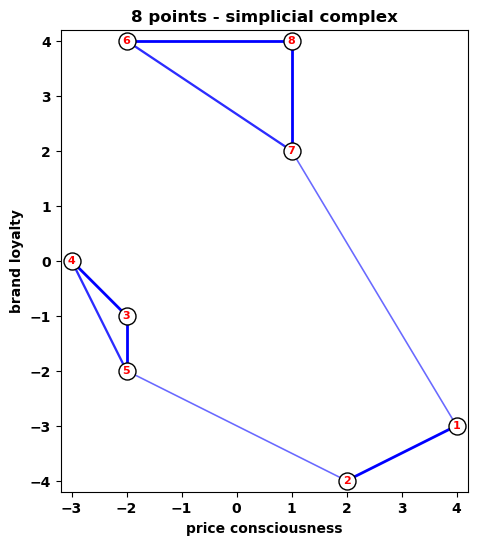

In [2]:
weights = np.zeros_like(distances)
for i in range(len(eight)):
    weights[i, closest_indices[i]] = 1
    weights[i, second_closest_indices[i]] = np.log2(3)-1

mutual_weights = weights + weights.T - np.multiply(weights, weights.T)

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(eight)):
    ax.scatter(eight[i, 0], eight[i, 1], c="w", edgecolor="black", s=150, zorder=10)
    ax.text(eight[i, 0], eight[i, 1], str(i + 1), zorder=15,
            horizontalalignment='center', verticalalignment='center', c="r", fontsize=8)

for i in range(len(eight)):
    for j in range(i + 1, len(eight)):
        if mutual_weights[i, j] > 0:
            x1, y1 = eight[i]
            x2, y2 = eight[j]
            ax.plot([x1, x2], [y1, y2], color="blue", alpha=mutual_weights[i, j], linewidth=2 * mutual_weights[i, j])

ax.set_xlim(-3.2, 4.2)
ax.set_ylim(-4.2, 4.2)
ax.set_xlabel('price consciousness')
ax.set_ylabel('brand loyalty')
plt.title('8 points - simplicial complex')
ax.set_aspect('equal')

plt.show()

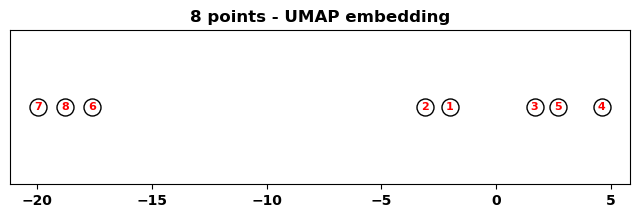

In [3]:
reducer = umap.UMAP(
        n_neighbors=2,
        n_components=1,
        min_dist=0.7
    )
Y = reducer.fit_transform(eight)

fig, ax = plt.subplots(figsize=(8,2))
ax.scatter(Y, np.zeros_like(Y), c="w", edgecolor="black", s=150, zorder=10)
for i in range(len(eight)):
    ax.text(Y[i], 0, str(i + 1), zorder=15,
            horizontalalignment='center', verticalalignment='center', c="r", fontsize=8)

plt.yticks([])
plt.title('8 points - UMAP embedding')
plt.show()